In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [4]:
num_rows = 45
num_columns = 130
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 6
name1 = 'A.J._Buckley'
name2 = 'Abbie_Cornish'
num_seconds = 3.0

In [5]:
featuresdf = data_load.make_dataframe_2speakers(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds, name1, name2)

./Dataset/wav/id10001\1zcIwhmdeo4\00001.wav
Yes
./Dataset/wav/id10001\1zcIwhmdeo4\00002.wav
Yes
./Dataset/wav/id10001\1zcIwhmdeo4\00003.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00001.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00002.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00003.wav
Yes
./Dataset/wav/id10001\7gWzIy6yIIk\00004.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00001.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00002.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00003.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00004.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00005.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00006.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00007.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00008.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00009.wav
Yes
./Dataset/wav/id10001\7w0IBEWc9Qw\00010.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00001.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00002.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00003.wav
Yes
./Dataset/wav/id10001\9mQ11vBs1wc\00004.

./Dataset/wav/id10004\6WxS8rpNjmk\00002.wav
./Dataset/wav/id10004\6WxS8rpNjmk\00003.wav
./Dataset/wav/id10004\8mWxQ6DRO-U\00001.wav
./Dataset/wav/id10004\8mWxQ6DRO-U\00002.wav
./Dataset/wav/id10004\8mWxQ6DRO-U\00003.wav
./Dataset/wav/id10004\8mWxQ6DRO-U\00004.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00001.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00002.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00003.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00004.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00005.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00006.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00007.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00008.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00009.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00010.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00011.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00012.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00013.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00014.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00015.wav
./Dataset/wav/id10004\bIZQaEVuATQ\00016.wav
./Dataset/wav/id10004\BOAd7pybyZ

./Dataset/wav/id10006\3MwyuwaVE50\00006.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00007.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00008.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00009.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00010.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00011.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00012.wav
Yes
./Dataset/wav/id10006\3MwyuwaVE50\00013.wav
Yes
./Dataset/wav/id10006\3RybHF5mX78\00001.wav
Yes
./Dataset/wav/id10006\3RybHF5mX78\00002.wav
Yes
./Dataset/wav/id10006\5PBimrKDrJQ\00001.wav
Yes
./Dataset/wav/id10006\5PBimrKDrJQ\00002.wav
Yes
./Dataset/wav/id10006\5PBimrKDrJQ\00003.wav
Yes
./Dataset/wav/id10006\5PBimrKDrJQ\00004.wav
Yes
./Dataset/wav/id10006\5tGaUGO_z50\00001.wav
Yes
./Dataset/wav/id10006\7qUfkhbDaqc\00001.wav
Yes
./Dataset/wav/id10006\7qUfkhbDaqc\00002.wav
Yes
./Dataset/wav/id10006\7qUfkhbDaqc\00003.wav
Yes
./Dataset/wav/id10006\7qUfkhbDaqc\00004.wav
Yes
./Dataset/wav/id10006\7qUfkhbDaqc\00005.wav
Yes
./Dataset/wav/id10006\7qUfkhbDaqc\00006.

In [6]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

In [7]:
learn.compile(model)

In [8]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 129, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 63, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 30, 64)         8

In [10]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNNMF', 'default', 'CNNMF')

Train on 162 samples, validate on 41 samples
Epoch 1/100
156/162 [===========================>..] - ETA: 0s - loss: 2.5008 - accuracy: 0.5833
Epoch 00001: val_loss improved from inf to 0.87595, saving model to saved_models/weights.best.CNNMF.hdf5
162/162 [==============================] - 2s 11ms/sample - loss: 2.4425 - accuracy: 0.5802 - val_loss: 0.8760 - val_accuracy: 0.3415
Epoch 2/100
156/162 [===========================>..] - ETA: 0s - loss: 2.3273 - accuracy: 0.5385
Epoch 00002: val_loss improved from 0.87595 to 0.52304, saving model to saved_models/weights.best.CNNMF.hdf5
162/162 [==============================] - 1s 5ms/sample - loss: 2.2988 - accuracy: 0.5309 - val_loss: 0.5230 - val_accuracy: 0.7317
Epoch 3/100
156/162 [===========================>..] - ETA: 0s - loss: 0.9269 - accuracy: 0.6154
Epoch 00003: val_loss did not improve from 0.52304
162/162 [==============================] - 1s 5ms/sample - loss: 0.9732 - accuracy: 0.6049 - val_loss: 0.5763 - val_accuracy: 0.6829

Epoch 29/100
156/162 [===========================>..] - ETA: 0s - loss: 0.1782 - accuracy: 0.9167
Epoch 00029: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.1728 - accuracy: 0.9198 - val_loss: 0.9120 - val_accuracy: 0.8780
Epoch 30/100
156/162 [===========================>..] - ETA: 0s - loss: 0.1462 - accuracy: 0.9295
Epoch 00030: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.1433 - accuracy: 0.9321 - val_loss: 0.9156 - val_accuracy: 0.9268
Epoch 31/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0710 - accuracy: 0.9679
Epoch 00031: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0749 - accuracy: 0.9691 - val_loss: 0.8991 - val_accuracy: 0.8780
Epoch 32/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0883 - accuracy: 0.9679
Epoch 00032: val_loss did not improve from 0.43337
162/1

Epoch 58/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0624 - accuracy: 0.9744
Epoch 00058: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0601 - accuracy: 0.9753 - val_loss: 1.4391 - val_accuracy: 0.9268
Epoch 59/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0268 - accuracy: 0.9872
Epoch 00059: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0269 - accuracy: 0.9877 - val_loss: 1.5227 - val_accuracy: 0.9268
Epoch 60/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0592 - accuracy: 0.9679
Epoch 00060: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0570 - accuracy: 0.9691 - val_loss: 1.3587 - val_accuracy: 0.9024
Epoch 61/100
156/162 [===========================>..] - ETA: 0s - loss: 0.1213 - accuracy: 0.9487
Epoch 00061: val_loss did not improve from 0.43337
162/1

Epoch 87/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0116 - accuracy: 1.0000
Epoch 00087: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.7902 - val_accuracy: 0.9268
Epoch 88/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0148 - accuracy: 0.9936
Epoch 00088: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0159 - accuracy: 0.9938 - val_loss: 2.0079 - val_accuracy: 0.9268
Epoch 89/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 1.0000
Epoch 00089: val_loss did not improve from 0.43337
162/162 [==============================] - 1s 5ms/sample - loss: 0.0160 - accuracy: 1.0000 - val_loss: 2.0349 - val_accuracy: 0.9268
Epoch 90/100
156/162 [===========================>..] - ETA: 0s - loss: 0.0115 - accuracy: 0.9936
Epoch 00090: val_loss did not improve from 0.43337
162/1

In [11]:
evaluate.evaluate_model(model, 'CNNMF', result_sets)

Training Accuracy:  0.88271606
Testing Accuracy:  0.9268293


In [12]:
evaluate.display_metrics(model, 'CNNMF', result_sets)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.96      0.93      0.94        27

    accuracy                           0.93        41
   macro avg       0.91      0.93      0.92        41
weighted avg       0.93      0.93      0.93        41

Confusion matrix: 
[[13  1]
 [ 2 25]]


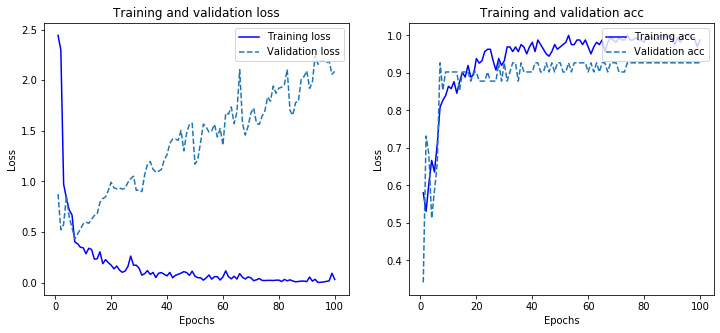

In [13]:
evaluate.plot_history(history)